In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
from LRGSG_package.LRGSG_plots import imshow_colorbar_caxdivider, generate_maxpercdiff_colormap
from LRGSG_package.LRGSG_utils import move_to_rootf, width_interval, dv, boolean_overlap_fraction
from LRGSG_package.nx_patches import signed_spectral_layout, get_kth_order_neighbours
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
side = 10
eigenmode = 0
#
theLattice = Lattice2D(#
    side1 = side,
    geometry = 'squared',
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
    initCond = 'all_1', # f'ground_state_{eigenmode}'
    pflip = 0.2,
    t_steps = 10,
    no_obs = 200
)
SLRG_obj.init_weights()
# #
# neg_weightsH = {(SLRG_obj.system.N//2+SLRG_obj.system.side1//2, 
#                  (SLRG_obj.system.N)//2+SLRG_obj.system.side1//2+1): -1}
# SLRG_obj.flip_sel_edges(neg_weightsH, 'H')
#
SLRG_obj.flip_random_fract_edges()

In [3]:
SLRG_obj.compute_k_eigvV()

In [4]:
magn, ene = SLRG_obj.run_ising_dynamics(nstepsIsing=200, T=0.31, tqdm_on=True)

time for full: 0.5945334434509277
time for sampling: 0.009813547134399414
time for flipping: 0.45201992988586426
time for flipping_neig1: 0.08561444282531738
time for flipping_neig2: 0.11379051208496094
time for flipping_flip: 0.0852208137512207


In [97]:
SLRG_obj.Ising_clusters = []
SLRG_obj.find_ising_clusters()
SLRG_obj.mapping_nodes_to_clusters()

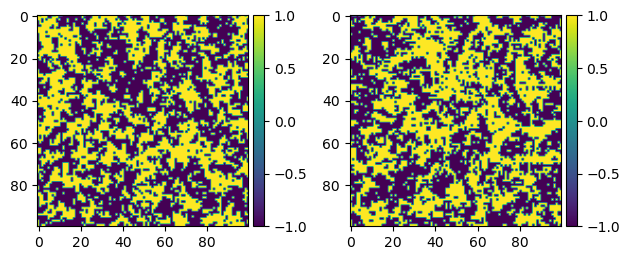

In [98]:
bineigv = SLRG_obj.eigV.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)
bineigv[bineigv < 0] = -1
bineigv[bineigv > 0] = +1

fig, ax = plt.subplots(ncols=2)
im1 = ax[0].imshow(
    SLRG_obj.magn_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)
)
imshow_colorbar_caxdivider(im1, ax[0])
im2 = ax[1].imshow(bineigv)
imshow_colorbar_caxdivider(im2, ax[1])
fig.tight_layout()

In [100]:
boolean_overlap_fraction((SLRG_obj.eigV > 0).flatten(), (SLRG_obj.magn_array > 0))

0.4826

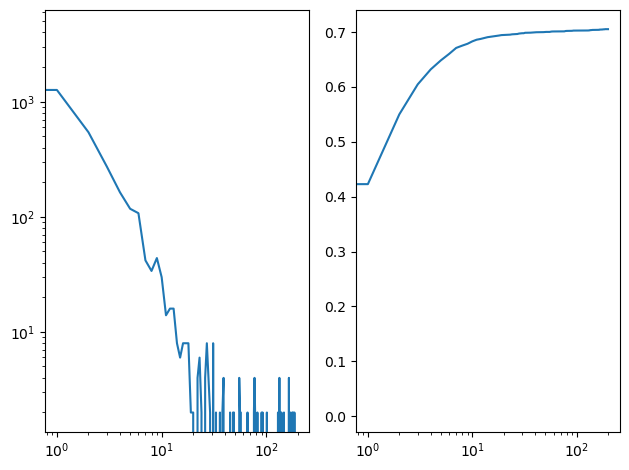

In [88]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.abs(np.roll(dv(np.array(ene)), 2)[2:]))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
#
ax[1].plot(np.abs(ene)/SLRG_obj.system.N)
ax[1].set_xscale('log')
fig.tight_layout()


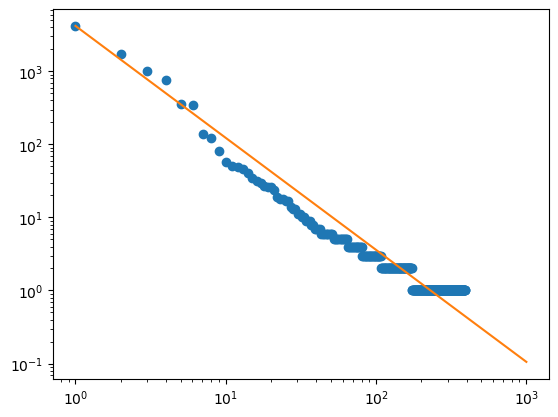

In [101]:
distr = np.unique(SLRG_obj.mapping, return_counts=True)
zipf  = sorted(distr[1], reverse=True)
plt.plot(np.linspace(1, len(zipf)+1, num=len(zipf)), zipf, 'o')
plt.plot(np.logspace(0, 3), max(zipf)*(np.logspace(0, 2))**-2.3)
plt.yscale('log')
plt.xscale('log')

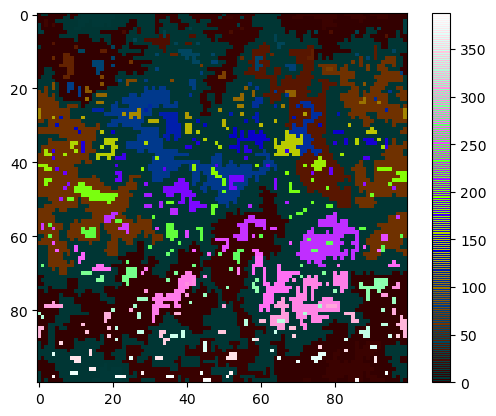

In [102]:
def map_tuple_to_numeric(tuple_value):
    # You can use a weighted sum of the tuple elements as an example
    # Adjust the weights as needed based on your data
    weight = [0.1, 0.2, 0.5]
    numeric_value = np.sum(tuple_value * weight)
    return numeric_value


vfunc = np.vectorize(map_tuple_to_numeric)

# Apply the mapping function to the entire 'result_array'
numeric_array = vfunc(SLRG_obj.mapping)
plt.imshow(
    SLRG_obj.mapping.astype(float),
    cmap=generate_maxpercdiff_colormap(SLRG_obj.numIsing_cl, 2),
)
plt.colorbar()

In [109]:
SLRG_obj.magn_array[SLRG_obj.biggestIsing_cl].shape

(10000,)

In [58]:
for T in np.linspace(0, 3, num=20):
    for i in range(100):
        # misurare la magnetizzazione dell'isola maggiore, 
        # mediarla dopo la termalizzazione
        pass
    # mediare tu tutte le realizzazioni
# diagramma di fase m VS T

In [103]:
SLRG_obj.run_ising_dynamics.neigh_ene()

AttributeError: 'function' object has no attribute 'neigh_ene'